Vehicle velocity model with slope.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Imports and helpers

In [3]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from scipy import constants

In [4]:
def eval_model(model, xs):
    return np.array(list(map(model, xs)))

## Mathematical model

$\frac{dv(t)}{dt} = \frac{1}{m} [ F_p u(t) - \frac{1}{2} \rho A C_d v(t)^2 ] - g sin(\theta)$

In [5]:
# Mass (car + load), kg
m = 700

# Thrust parameter, (N / %pedal)
F_p = 30

# Air density, kg/m^3
rho = 1.225 

# vehicle cross-sectional area (m^2)
A = 5

# Drag coefficient
C_d = 0.24

def vehicle_model(v, t, u_func, theta_func):
    
    u = u_func(t)
    theta = theta_func(t)
        
    drive = F_p * u
    drag = 0.5 * rho * A * C_d * (v**2)
    slope = constants.g * np.sin(theta)
    
    return (1. / m) * (drive - drag) - slope
    

## Simulation

In [6]:
t = np.linspace(0, 200, 100)

Functions for input and disturbance

In [7]:
step_t = 5
step_val = 50

# Input function
def step_input(t):
    return 0 if t < step_t else step_val

In [8]:
# No disturbance
def no_slope(t):
    return 0

# Some disturbance on the way
def slope_model(t):
        
    if t < 100:
        return 0
    
    if t >= 100 and t < 150:
        return np.deg2rad(10)
    
    return 0

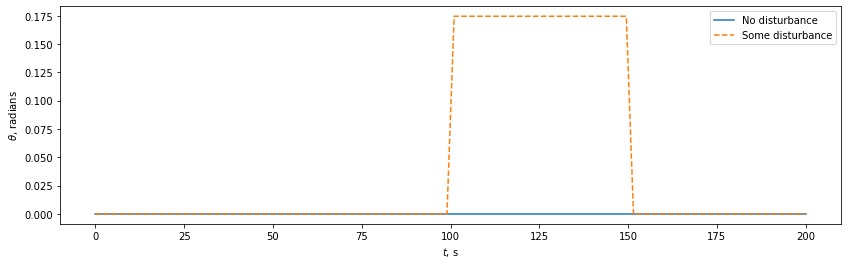

In [9]:
plt.figure(figsize=(14, 4))
plt.plot(t, eval_model(no_slope, t), label='No disturbance')
plt.plot(t, eval_model(slope_model, t), '--', label='Some disturbance')
plt.legend()
plt.xlabel('$t$, s')
plt.ylabel(r'$\theta$, radians')
plt.show()

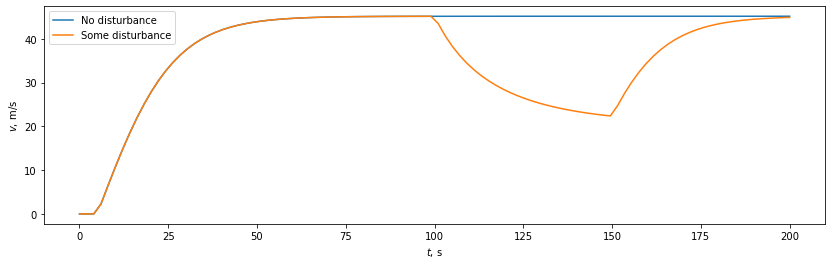

In [10]:
initial = 0

v_sim_0 = odeint(vehicle_model, initial, t, args=(step_input, no_slope))
v_sim_1 = odeint(vehicle_model, initial, t, args=(step_input, slope_model))

plt.figure(figsize=(14, 4))
plt.plot(t, v_sim_0, label='No disturbance')
plt.plot(t, v_sim_1, label='Some disturbance')
plt.legend()
plt.xlabel('$t$, s')
plt.ylabel('$v$, m/s')
plt.show()